<a href="https://colab.research.google.com/github/jbk41/ai_final/blob/master/q1/question1_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Introduction to AI: Final Project
# Question 1, Part 1

In [2]:
import keras
import matplotlib.pyplot as plt
from keras import backend as K
import numpy as np

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28

num_classes = 10

# the data, split between train and test sets
(x_train, y_train_num), (x_test, y_test_num) = mnist.load_data()


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train_num, num_classes)
y_test = keras.utils.to_categorical(y_test_num, num_classes)

In [0]:
#hyper_parameters
batch_size = 64
epochs = 11
dropout_rate = .5
alpha = .2

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [6]:
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D

model2 = Sequential()

# Stage 1
model2.add(ZeroPadding2D(2))
model2.add(Conv2D(32, 
                 kernel_size=(5,5), 
                 strides=1, 
                 #padding='valid', 
                 input_shape=(28,28,1)))
                 #activation=LeakyReLU(), 
model2.add(LeakyReLU(alpha=alpha))

model2.add(ZeroPadding2D(padding=(2, 2)))
model2.add(Conv2D(32, 
                 kernel_size=(5,5), 
                 strides=1))
                 #padding='valid')) 
                 #activation=LeakyReLU()))
model2.add(LeakyReLU(alpha=alpha))


model2.add(MaxPooling2D(pool_size=(2,2), 
                       strides=(2,2),
                       padding='valid'))
model2.add(Dropout(dropout_rate))

# Stage 2
for i in range(2):
  model2.add(ZeroPadding2D(2))
  model2.add(Conv2D(64, 
                  kernel_size=(5,5), 
                  strides=1))
                  #padding='valid')) 
                  #activation=LeakyReLU()))
  model2.add(LeakyReLU(alpha=alpha))


model2.add(MaxPooling2D(pool_size=(2,2), 
                       strides=(2,2), 
                       padding='valid'))
model2.add(Dropout(dropout_rate))

# Stage 3
for i in range(2):
  model2.add(ZeroPadding2D(2))
  model2.add(Conv2D(128, 
                  kernel_size=(5,5), 
                  strides=1)) 
                  #padding='valid'))
  model2.add(LeakyReLU(alpha=alpha))

                  #activation=LeakyReLU()))
model2.add(MaxPooling2D(pool_size=(2,2), 
                       strides=(2,2), 
                       padding='valid'))


# Stage 4
model2.add(Flatten())
model2.add(Dense(2, 
                 name='stage4',
                activation='linear'))
#model2.add(Dropout(dropout_rate))

# Stage 
model2.add(Dense(10, 
                activation='softmax'))

In [7]:
model = Sequential()

# Stage 1
model.add(Conv2D(20, 
                 kernel_size=(5,5), 
                 strides=1, 
                 padding='valid', 
                 activation='relu', 
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2,2), 
                       strides=(2,2), 
                       padding='valid'))
#model.add(Dropout(0.25))

# Stage 2
model.add(Conv2D(50, 
                 kernel_size=(5,5), 
                 strides=1, 
                 padding='valid', 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), 
                       strides=(2,2), 
                       padding='valid'))
model.add(Dropout(0.45))

# Stage 3
model.add(Flatten())
model.add(Dense(500, 
                activation='relu'))
model.add(Dropout(0.25))

# Stage 4
model.add(Dense(10, 
                activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
from keras.optimizers import SGD


sgd = SGD(lr=0.1, decay=1e-6, momentum=.9)

model.compile(optimizer=sgd, 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])
model2.compile(optimizer=sgd, 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

Part 1

In [9]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0000001)

history = model.fit(x_train, 
          y_train, 
          validation_data=(x_test, y_test),
          callbacks=[reduce_lr],
          batch_size=batch_size, 
          epochs=epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/11





60000/60000 [==============================] - 11s 181us/step - loss: 0.3062 - acc: 0.9086 - val_loss: 0.0777 - val_acc: 0.9784
Epoch 2/11
60000/60000 [==============================] - 4s 66us/step - loss: 0.2063 - acc: 0.9449 - val_loss: 0.0972 - val_acc: 0.9746
Epoch 3/11
60000/60000 [==============================] - 4s 68us/step - loss: 0.2067 - acc: 0.9469 - val_loss: 0.0976 - val_acc: 0.9727
Epoch 4/11
60000/60000 [==============================] - 4s 67us/step - loss: 0.2758 - acc: 0.9344 - val_loss: 0.1015 - val_acc: 0.9738
Epoch 5/11
60000/60000 [==============================] - 4s 67us/step - loss: 0.2835 - acc: 0.9364 - val_loss: 0.1706 - val_acc: 0.9546
Epoch 6/11
60000/60000 [==============================] - 4s 66us/step - loss: 0.1510 - acc: 0.9613 - val_loss: 0.0797 - val_acc: 0.9795
Epoch 7/11
60000/60000 [

Model 1: Train acc = 98.17%, val acc = 98.82%

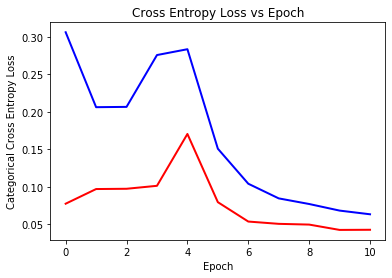

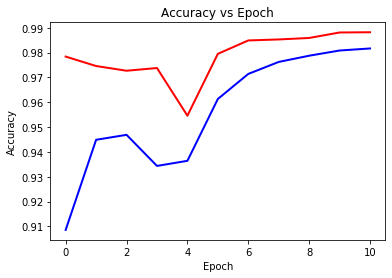

In [11]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['acc']
val_acc    = history.history['val_acc']

# Plot loss
fig = plt.figure()
plt.plot(train_loss, color='blue', linewidth=2)
plt.plot(val_loss, color='red', linewidth=2)
plt.title("Cross Entropy Loss vs Epoch")
plt.ylabel("Categorical Cross Entropy Loss")
plt.xlabel("Epoch")
plt.show()

# Plot accuracy
fig = plt.figure()
plt.plot(train_acc, color='blue', linewidth=2)
plt.plot(val_acc, color='red', linewidth=2)
plt.title("Accuracy vs Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [10]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0000001)
# hyper_parameters used: batch_size, epochs
history2 = model2.fit(x_train, 
          y_train, 
          validation_data=(x_test, y_test),
          callbacks=[reduce_lr],
          batch_size=batch_size, 
          epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/11
60000/60000 [==============================] - 11s 177us/step - loss: 0.6612 - acc: 0.7911 - val_loss: 0.1927 - val_acc: 0.9584
Epoch 2/11
60000/60000 [==============================] - 10s 167us/step - loss: 0.2321 - acc: 0.9449 - val_loss: 0.1647 - val_acc: 0.9639
Epoch 3/11
60000/60000 [==============================] - 10s 166us/step - loss: 0.1932 - acc: 0.9555 - val_loss: 0.0988 - val_acc: 0.9775
Epoch 4/11
60000/60000 [==============================] - 10s 167us/step - loss: 0.1698 - acc: 0.9627 - val_loss: 0.1113 - val_acc: 0.9766
Epoch 5/11
60000/60000 [==============================] - 10s 166us/step - loss: 0.1560 - acc: 0.9653 - val_loss: 0.1333 - val_acc: 0.9742
Epoch 6/11
60000/60000 [==============================] - 10s 165us/step - loss: 0.1499 - acc: 0.9663 - val_loss: 0.1095 - val_acc: 0.9798
Epoch 7/11
60000/60000 [==============================] - 10s 166us/step - loss: 0.1558 - acc: 0.9643 - val_loss: 0.

Model 2: Train acc = 98.75%, val acc = 99.08%

In [0]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_7 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)       

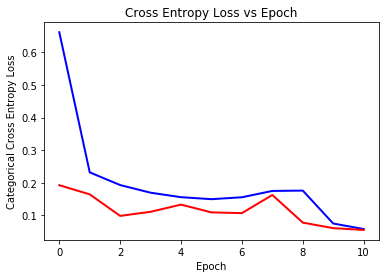

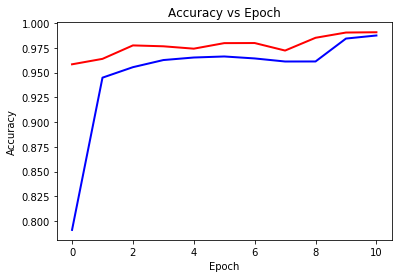

In [12]:
train_loss2 = history2.history['loss']
val_loss2   = history2.history['val_loss']
train_acc2  = history2.history['acc']
val_acc2    = history2.history['val_acc']

# Plot loss
fig = plt.figure()
plt.plot(train_loss2, color='blue', linewidth=2)
plt.plot(val_loss2, color='red', linewidth=2)
plt.title("Cross Entropy Loss vs Epoch")
plt.ylabel("Categorical Cross Entropy Loss")
plt.xlabel("Epoch")
plt.show()

# Plot accuracy
fig = plt.figure()
plt.plot(train_acc2, color='blue', linewidth=2)
plt.plot(val_acc2, color='red', linewidth=2)
plt.title("Accuracy vs Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [0]:
name_last_layer = str(model2.layers[-1])
model2_activation = Sequential()
for layer in model2.layers:
    if str(layer) != name_last_layer:
        model2_activation.add(layer)

In [0]:
pred_test = model2_activation.predict(x_test)
pred_train = model2_activation.predict(x_train)

In [17]:
# Plot accuracy
fig = plt.figure()
plt.plot(train_acc2, color='blue', linewidth=2)
plt.plot(val_acc2, color='red', linewidth=2)
plt.title("Accuracy vs Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

(28, 28, 1)


In [0]:
activations = {}

for i in range(len(y_train_num)):
  res = y_train_num[i]
  output = pred_train[i]

  if res not in activations:
    activations[res] = [[],[]]

  activations[res][0].append(output[0])
  activations[res][1].append(output[1])


for i in range(len(y_test_num)):
  res = y_test_num[i]
  output = pred_test[i]

  if res not in activations:
    activations[res] = []
  activations[res][0].append(output[0])
  activations[res][1].append(output[1])

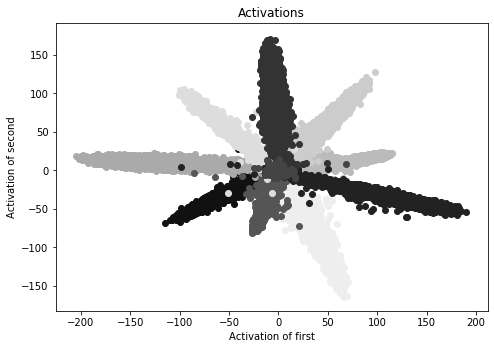

In [35]:
#girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
#boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
#grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
colors = ['#aaaaaa','#bbbbbb','#cccccc','#dddddd','#eeeeee','#111111','#222222','#333333','#444444','#555555']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

for val in activations:
  output = activations[val]
  first = output[0]
  second = output[1]
  ax.scatter(first, second, color=colors[val])

ax.set_xlabel('Activation of first')
ax.set_ylabel('Activation of second')
ax.set_title('Activations')
plt.show()

In [34]:
print(activations[0][1])

[13.764669, 13.549252, 7.602485, 14.78693, 7.690344, 13.0722685, 7.018775, 11.264408, 6.202113, 7.531831, 3.651743, 11.202193, 13.06782, 13.885019, 10.338791, 14.89588, 14.582111, 14.946712, 9.928631, 11.206936, 16.444864, 8.35052, 14.928984, 8.008706, 5.9870815, 12.382797, 13.781312, 9.315012, 9.094677, 13.548741, 5.7364707, 17.679762, 10.732263, 9.378474, 12.887258, 10.425869, 13.86553, 15.796879, 13.691578, 14.135285, 17.207998, 17.599178, 5.3888817, 15.720915, 13.034682, 9.543268, 13.871795, 15.799729, 10.967691, 9.392807, 13.971235, 8.361271, 15.259785, 10.17168, 3.6437724, 11.058081, 12.122125, 15.201242, 12.810416, 16.970484, 7.357254, 15.790583, 16.17739, 10.784737, 10.061085, 8.146786, 11.843488, 12.499384, 9.94672, 9.623047, 8.224753, 3.8953292, 12.280033, 10.828847, 11.899217, 13.383722, 11.973963, 16.333612, 9.613354, 9.847243, 13.624739, 11.21739, 8.309572, 12.538097, 7.757152, 14.394524, 6.1941733, 4.2194533, 9.89337, 5.512449, 8.484619, 7.8155704, 6.7037983, 10.307791, 9